<a href="https://colab.research.google.com/github/Quinta10/SeaBass_parsing/blob/main/Chla_data_EXPORTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries for the task
import pandas as pd  # works with DataFrames (import data)
import numpy as np   # works with arrays
import matplotlib.pyplot as plt # plot data 
import matplotlib as mpl 
import seaborn as sns
import csv # to open text files

- here we import libraries and connect to google drive. 
- most problems here are path changes

In [2]:
#here we connect to the google drive and load libraries
from google.colab import drive

import os
import pandas as pd
import numpy as np
import re
import sys
from pathlib import Path

drive.mount('/content/drive')

Mounted at /content/drive


<function matplotlib.pyplot.show(*args, **kw)>

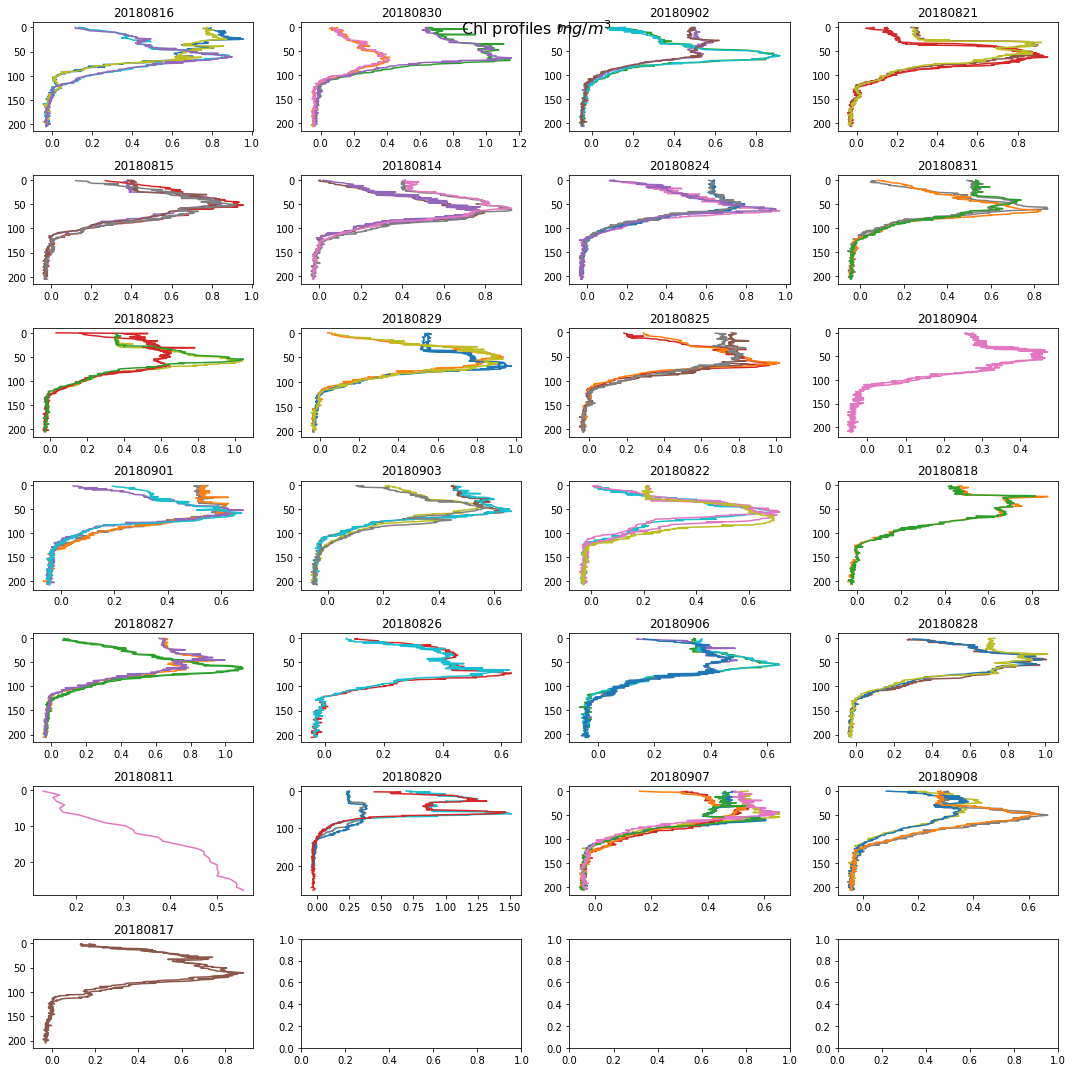

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Seabass/Carbon_EXPORTS_chla.cvs'
                 , sep = ',') 
# chlorophyll only
df = df.drop(['station', 'tot_chl_a', 'tchl'], axis = 1)
df = df.dropna()


# we choose profiles based on the day = unique record in a date
date_list = df['date'].unique()

# set up the subplots

l = len(date_list) # number of plots
m = 4              # rows

n = lambda l: l/m if l%m==0 else int(l/m)+1
p1 = lambda i: int((i-1)/m)
p2 = lambda i: (i+3)%m

fig, axs = plt.subplots(n(l),m, figsize=(15, 15))
fig.suptitle('Chl profiles $mg/m^{3}$', fontsize=16)
# here we choose dataframe rows for the day and get the number of subplots

i = 0 # subplots count
for days in date_list:  
    df_day = df.loc[df['date'] == days]
    time_list = df['time'].unique()
    i += 1
    for times in time_list: 
        df_time = df_day[df_day['time']== times]
        chl = df_time['chl'].to_numpy()
        depth = df_time['depth'].to_numpy()
        axs[p1(i),p2(i)].plot(chl, depth)
        axs[p1(i),p2(i)].set_title(date_list[i-1])
        
    axs[p1(i),p2(i)].invert_yaxis() 

plt.tight_layout()
plt.show
            
    
    
# print(data_list)

** Observations:**
- a profile of 08/11/2018 looks wrong. an outlier?
- proficles show diurnal variability
- max CHL layer is about 50m deep
- max value of cl varies from 0.4 mg/m3 (09/04/2018) to 1.5 (08/20/2018)

**SAND BOX:**
Random test of bits and parts

In [ ]:
depth

array([], dtype=float64)

In [ ]:
df_day = df.loc[df['date'] == 20180816]
time_list = df['time'].unique()
print(time_list)
# df_day.tail()
df_time = df_day[df_day['time']== '14:11:49']

In [ ]:
chl = df_time['chl'].to_numpy()
depth = df_time['depth'].to_numpy()

plt.title("CHL") 
plt.plot(chl, depth, label=time_list[0]) 
plt.plot(chl+5, depth, label=time_list[1]) 
plt.gca().invert_yaxis()
plt. legend()
plt.show()

In [ ]:
n = lambda m: m/4 if m%4==0 else int(m/4)+1

print(n(29))

8


In [ ]:
m =4
p1 = lambda i: int((i-1)/m)
p2 = lambda i: (i+3)%m
z = 12
print(p1(z), p2(z))

2 3
